             preco_ultimo_negocio
data_pregao                      
2018-10-17                   2.30
2018-10-18                   2.31
2018-10-19                   2.45
2018-10-22                   2.45
2018-10-23                   2.54


<function matplotlib.pyplot.show(close=None, block=None)>

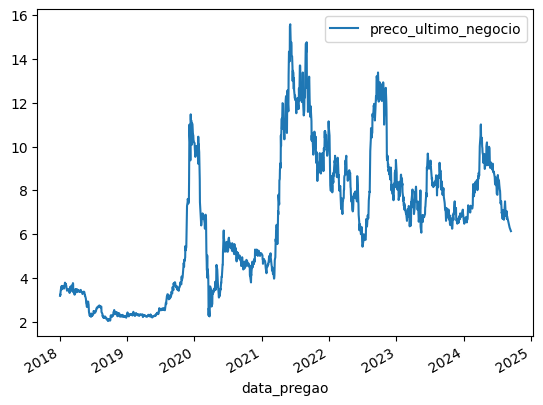

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot

data = pd.read_csv('./dataset/dados_pregao_posi3.csv', header=0, parse_dates=True, index_col=0)
df = data[['preco_ultimo_negocio']]
print(df.head())
df.plot()
pyplot.show

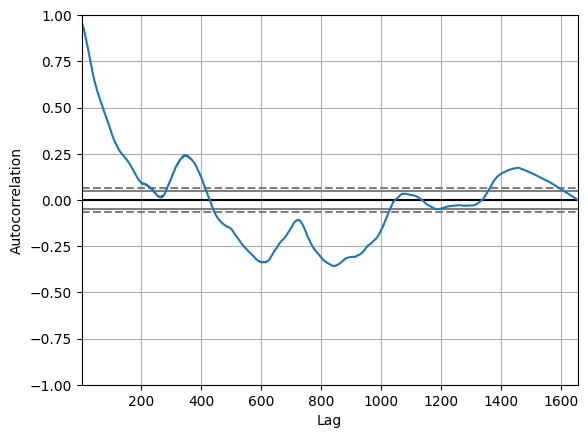

In [2]:
from pandas import read_csv
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df)
pyplot.show()

In [3]:
from pmdarima import auto_arima
import warnings

warnings.filterwarnings('ignore')

In [4]:
stepwise_fit = auto_arima(df['preco_ultimo_negocio'], trace=True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3748.748, Time=0.63 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4465.551, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4012.049, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3794.207, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4463.551, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3759.553, Time=0.59 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3757.271, Time=0.41 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=3725.819, Time=1.01 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=3735.658, Time=0.59 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=3739.592, Time=1.15 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=3723.089, Time=2.17 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=3752.326, Time=2.12 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=3724.764, Time=2.59 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=3716.851, Time=1.92 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept

predicted=6.784871, expected=6.580000
predicted=6.528777, expected=6.480000
predicted=6.466166, expected=6.390000
predicted=6.508286, expected=6.590000
predicted=6.607930, expected=7.480000
predicted=6.802949, expected=7.200000
predicted=6.911385, expected=7.570000
predicted=7.207223, expected=7.820000
predicted=7.442285, expected=7.910000
predicted=7.579969, expected=8.040000
predicted=7.840275, expected=7.620000
predicted=7.847967, expected=7.590000
predicted=7.796710, expected=7.460000
predicted=7.614933, expected=7.330000
predicted=7.469453, expected=7.240000
predicted=7.377453, expected=6.920000
predicted=7.253075, expected=7.210000
predicted=7.239106, expected=7.500000
predicted=7.244369, expected=7.920000
predicted=7.403484, expected=7.910000
predicted=7.644486, expected=7.890000
predicted=7.820587, expected=8.170000
predicted=8.002211, expected=8.050000
predicted=7.969590, expected=7.590000
predicted=7.890265, expected=7.510000
predicted=7.741050, expected=7.410000
predicted=7.

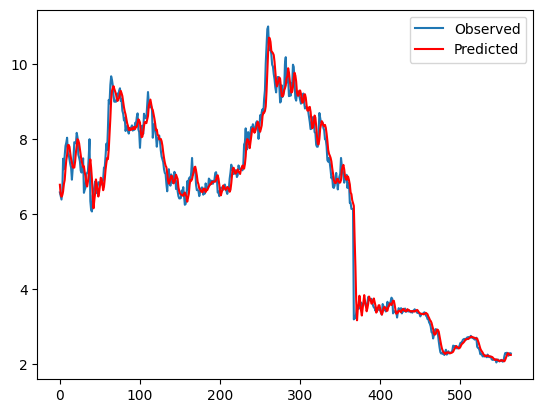

In [5]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

X = df.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(5,1,5))
    model_fit = model.fit()

    output = model_fit.forecast()
    yhat = output[0]

    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

pyplot.plot(test, label='Observed')
pyplot.plot(predictions, color='red', label='Predicted')
pyplot.legend()
pyplot.show()
